In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"

    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"

    def run(self, images):
        pass


class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"

    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array(
    [MyPreProcess(), MyProcess(), MyPostProcess(), MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)

Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


## Post Processing

In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import csv
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.cluster import KMeans
import sklearn
from sklearn.cluster import DBSCAN
from matplotlib import patches

In [2]:
path = "C:/Users/ng85ffc/Desktop/"
path1 = "Data/"
path2 = "ProjetInterpromo2020g8/images/"
path3 = "LAYOUT SEATGURU"

### Data extraction and formatting

In [3]:
plan = open(path + path1 +
            "coord_Aer_Lingus_Airbus_A320_plane9.jpg.txt", "r")
data = plan.read()

In [4]:
x = []
y = []
data = data.replace('\n', ',').replace(' ', '').split(',')
data.remove('')

In [5]:
data

['temp_business_seat_armrest_left.jpg',
 'temp_business_seat_armrest_right.jpg',
 'temp_business_seat_footrest.jpg',
 'temp_first_seat.jpg',
 'temp_normal_seat.jpg',
 '134',
 '341',
 '154',
 '341',
 '175',
 '341',
 '225',
 '341',
 '245',
 '341',
 '266',
 '341',
 '134',
 '371',
 '154',
 '371',
 '175',
 '371',
 '225',
 '371',
 '245',
 '371',
 '266',
 '371',
 '134',
 '401',
 '154',
 '401',
 '175',
 '401',
 '225',
 '401',
 '245',
 '401',
 '266',
 '401',
 '134',
 '431',
 '154',
 '431',
 '175',
 '431',
 '225',
 '431',
 '245',
 '431',
 '266',
 '431',
 '134',
 '461',
 '154',
 '461',
 '175',
 '461',
 '225',
 '461',
 '245',
 '461',
 '266',
 '461',
 '134',
 '492',
 '154',
 '492',
 '175',
 '492',
 '225',
 '492',
 '245',
 '492',
 '266',
 '492',
 '134',
 '523',
 '154',
 '523',
 '175',
 '523',
 '225',
 '523',
 '245',
 '523',
 '266',
 '523',
 '134',
 '553',
 '154',
 '553',
 '175',
 '553',
 '225',
 '553',
 '245',
 '553',
 '266',
 '553',
 '134',
 '583',
 '154',
 '583',
 '175',
 '583',
 '225',
 '583',
 '

In [6]:
line_head = []
for line in range(len(data)):
    if data[line][len(data[line])-3:len(data[line])] == "jpg" or data[line][len(data[line])-3:len(data[line])] == "png":
        line_head.append(line)

In [7]:
line_head

[0, 1, 2, 3, 4, 305, 782, 783, 1184]

In [8]:
for i in reversed(line_head):
    del data[i]

In [9]:
data = [int(i) for i in data]

for i in range(0, len(data)-1, 2):
    x.append(int(data[i]))
    y.append(int(data[i+1]))

list_test = list(zip(x,y))
array_test = np.array(list(zip(x,y)))

In [10]:
list_test

[(134, 341),
 (154, 341),
 (175, 341),
 (225, 341),
 (245, 341),
 (266, 341),
 (134, 371),
 (154, 371),
 (175, 371),
 (225, 371),
 (245, 371),
 (266, 371),
 (134, 401),
 (154, 401),
 (175, 401),
 (225, 401),
 (245, 401),
 (266, 401),
 (134, 431),
 (154, 431),
 (175, 431),
 (225, 431),
 (245, 431),
 (266, 431),
 (134, 461),
 (154, 461),
 (175, 461),
 (225, 461),
 (245, 461),
 (266, 461),
 (134, 492),
 (154, 492),
 (175, 492),
 (225, 492),
 (245, 492),
 (266, 492),
 (134, 523),
 (154, 523),
 (175, 523),
 (225, 523),
 (245, 523),
 (266, 523),
 (134, 553),
 (154, 553),
 (175, 553),
 (225, 553),
 (245, 553),
 (266, 553),
 (134, 583),
 (154, 583),
 (175, 583),
 (225, 583),
 (245, 583),
 (266, 583),
 (134, 614),
 (154, 614),
 (175, 614),
 (225, 614),
 (245, 614),
 (266, 614),
 (134, 722),
 (154, 722),
 (175, 722),
 (225, 722),
 (245, 722),
 (266, 722),
 (134, 752),
 (154, 752),
 (175, 752),
 (225, 752),
 (245, 752),
 (266, 752),
 (134, 782),
 (154, 782),
 (175, 782),
 (225, 782),
 (245, 782),

### Remove duplicate

In [11]:
def remove_duplicate(coordinate: list):
    """Documentation
    Parameters:
        coordinate: original coordinates without treatment
    Out:
        dup: list of coordinate which are duplicated
    """
    dup = []
    for point1 in coordinate:
        for point2 in coordinate:
            if point2 != point1 and point1 not in dup:
                if ((abs(point1[0] - point2[0]) <= 5) and (abs(point1[1] - point2[1]) <= 5)):
                    dup.append(point2)
    for d in dup:
        if d in coordinate: coordinate.remove(d)
    return(coordinate)

In [12]:
#list_wo_dup = remove_duplicate(find_duplicate(list_test), list_test)
list_wo_dup = remove_duplicate(list_test)

In [13]:
x_wo_dup = [a for a,b in list_wo_dup]
y_wo_dup = [b for a,b in list_wo_dup]
array_wo_dup = np.array(list(zip(x_wo_dup,y_wo_dup)))

### Find cluster with DBScan

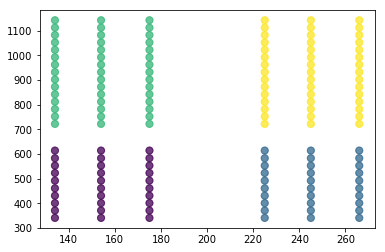

In [14]:
dbscan = DBSCAN(eps=38, min_samples=3).fit(list_wo_dup)
plt.scatter(x_wo_dup, y_wo_dup, c=dbscan.labels_.astype(float), s=50, alpha=0.5)
plt.show()

### Draw cluster on template

In [15]:
def clusters_to_rect(dbscan: sklearn.cluster.dbscan_.DBSCAN, array_wo_dup: np.array):
    """Documentation
    Parameters:
        dbscan: result of the clustering with DBSCAN
    Out:
        list_rect: list of rectangles representing each cluster
    """
    list_coord = array_wo_dup
    label_groups = pd.Series(dbscan.labels_).unique()
    list_rect = []  # to plot with plt.patches
    list_rect2 = []  # all corners of the rectangles
    HEIGHT: int = 30
    WIDTH: int = 20
    for group in label_groups:
        index = [i for i, x in enumerate(list(dbscan.labels_)) if x == group]
        points_cluster = list_coord[index]
        corner_bottom_right = (max(i[0] for i in points_cluster) + WIDTH, min(
            i[1] for i in points_cluster) - HEIGHT)
        corner_top_right = (max(i[0] for i in points_cluster) + WIDTH, max(
            i[1] for i in points_cluster))
        corner_top_left = (min(i[0] for i in points_cluster), max(
            i[1] for i in points_cluster))
        corner_bottom_left = (min(i[0] for i in points_cluster), min(
            i[1] for i in points_cluster) - HEIGHT)
        height = corner_top_right[1] - corner_bottom_right[1]
        width = corner_bottom_right[0] - corner_bottom_left[0]
        list_rect.append(((corner_bottom_left), width, height))
        list_rect2.append(
            (corner_bottom_left, corner_top_left, corner_top_right, corner_bottom_right))
    return list_rect, list_rect2

In [16]:
r, r2 = clusters_to_rect(dbscan, array_wo_dup)

In [17]:
obstacle = [[(206, 217), (253, 290)],
 [(207, 133), (252, 194)],
 [(266, 122), (281, 130)],
 [(266, 131), (281, 137)],
 [(266, 292), (282, 300)],
 [(267, 285), (282, 293)],
 [(639, 125), (651, 133)],
 [(643, 294), (651, 299)],
 [(678, 126), (690, 133)],
 [(678, 294), (690, 299)],
 [(1184, 140), (1187, 149)],
 [(1184, 230), (1188, 242)],
 [(1198, 130), (1233, 196)],
 [(1199, 226), (1234, 292)],
 [(1246, 119), (1261, 127)],
 [(1247, 296), (1262, 304)],
 [(1273, 130), (1350, 292)]]

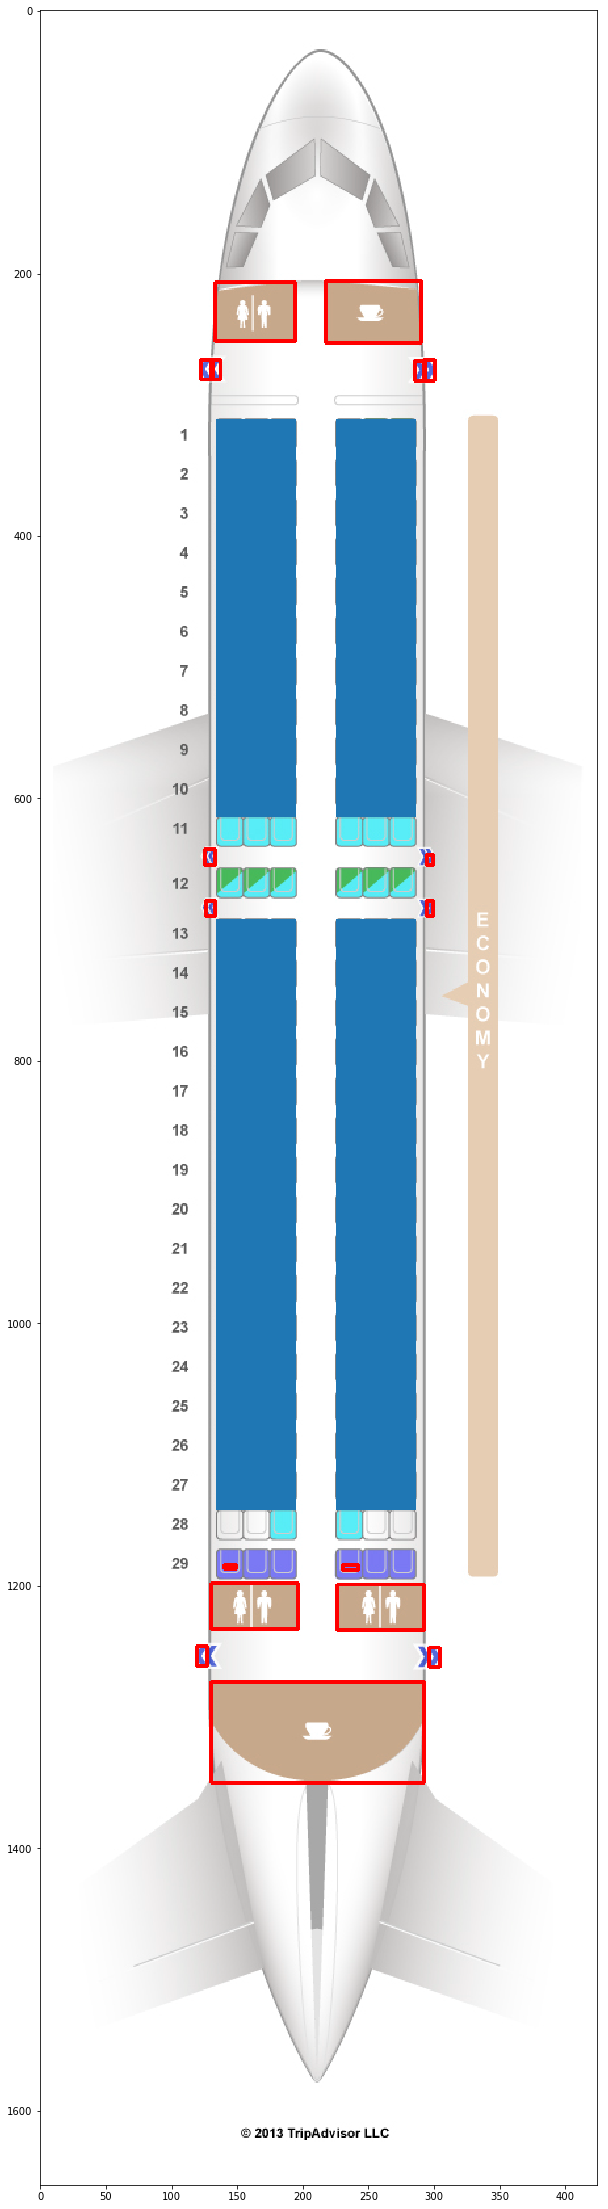

In [18]:
fig1 = plt.figure(figsize=(20, 40))
ax1 = fig1.add_subplot(111, aspect='equal')
for rect in r:
    ax1.add_patch(
        patches.Rectangle(rect[0], rect[1], rect[2]))

# x_coord = [i[0][0] for i in r]
# y_coord = [i[0][1] for i in r]
# plt.xlim(min(x_coord)-10,max(x_coord)+r[x_coord.index(max(x_coord))][1]+10)
# plt.ylim(min(y_coord)-10,max(y_coord)+r[y_coord.index(max(y_coord))][2]+10)
# plt.xlim(0,500)



img_rgb = plt.imread(path + path1 + path3 +
                     "/Aer_Lingus_Airbus_A320_plane9.jpg")
# plt.imshow(img_rgb)

img_cv = cv2.imread(path + path1 + path3 +
                     "/Aer_Lingus_Airbus_A320_plane9.jpg")
for obs in obstacle:
    A_point = obs[0][1], obs[0][0]
    B_point = obs[1][1], obs[1][0]
    
    img_cv = cv2.rectangle(img_cv, A_point, B_point, (255, 0, 0), 2)

# plt.figure(figsize=(20,40))
plt.imshow(img_cv)
plt.show()

In [20]:
def centroid_obstacle(point):
    A_point = point[0][1], point[0][0]
    B_point = point[1][1], point[1][0]
    return int(np.mean([A_point[0], B_point[0]])), int(np.mean([A_point[1], B_point[1]]))

def centroid_seat(point):
    x, y = point[0], point[1]
    h, w  = 30, 20
    return int(np.mean([x, x+w])), int(np.mean([y, y+h]))

obs_bary = centroid(obstacle[0])
theo_bary = centroid_seat(list_wo_dup[0]), list_wo_dup[0]

def distance():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-20-f24452ba6f03>, line 15)